In [118]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Checking assumptions of Linear Regression

#### 1. The relationship between the features and the target should be linear in nature

In [120]:
def scatterplot(x, y = advertising["Sales"]):
    plt.scatter(x, y)
    plt.title("Scatterplot")
    plt.xlabel(x.name)
    plt.ylabel("Sales")

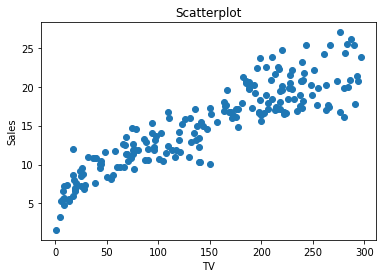

In [121]:
scatterplot(advertising["TV"])

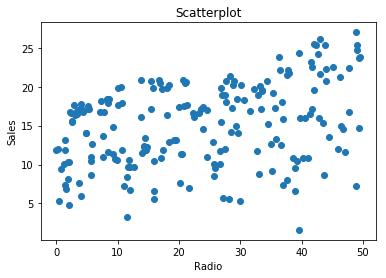

In [122]:
scatterplot(advertising["Radio"])

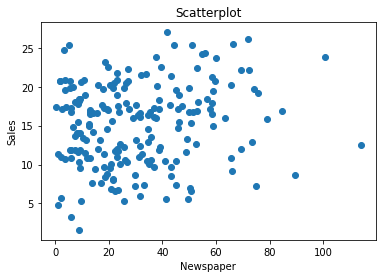

In [123]:
scatterplot(advertising["Newspaper"])

#### 2. There should be no multicollinearity in the data

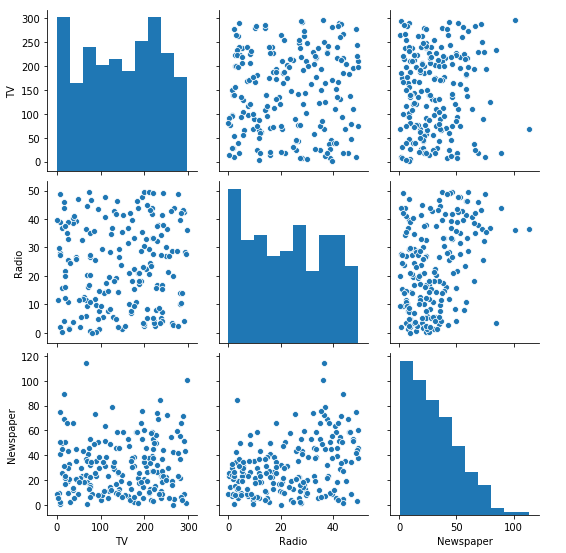

In [124]:
sns.pairplot(advertising[['TV','Radio','Newspaper']])

#### 3.  Homoscedasticity

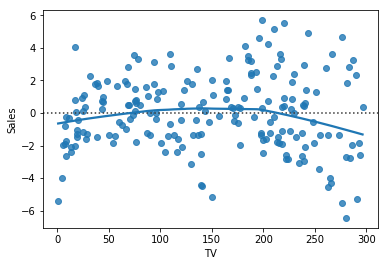

In [125]:
sns.residplot(x = advertising['TV'], y = advertising["Sales"], lowess = True)

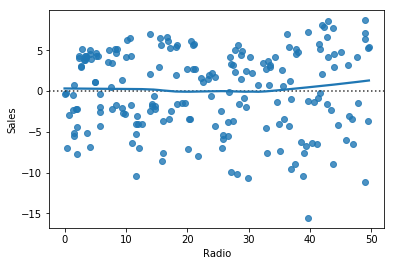

In [126]:
sns.residplot(x = advertising['Radio'], y = advertising["Sales"], lowess = True)

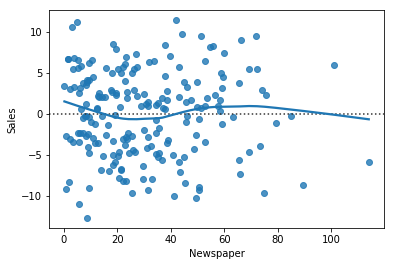

In [127]:
sns.residplot(x = advertising['Newspaper'], y = advertising["Sales"], lowess = True)

In [128]:
Ststsmodels_model = smf.ols(formula='Sales ~ TV', data = advertising)
Ststsmodels_result = Ststsmodels_model.fit()

# print the coefficients
Ststsmodels_result.params

Intercept    6.974821
TV           0.055465
dtype: float64

C:\ProgramData\Miniconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


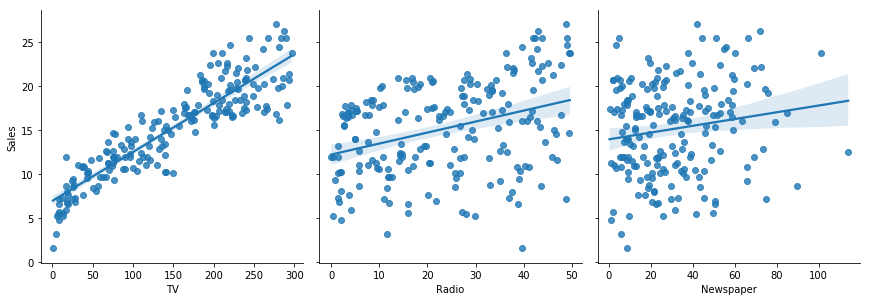

In [129]:
sns.pairplot(advertising, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg')

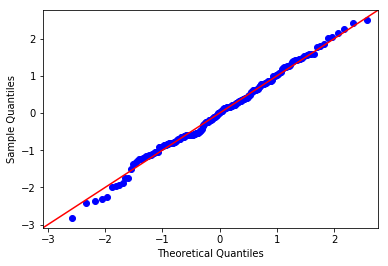

In [130]:
Ststsmodels_residual = Ststsmodels_result.resid
ax = sm.qqplot(Ststsmodels_residual, fit = True, line = "45")

#### 5. No autocorrelation in residuals

### Fitting a multiple Linear Regression

In [131]:
Ststsmodels_model = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=advertising)
Ststsmodels_result = Ststsmodels_model.fit()
Ststsmodels_result.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [132]:
Ststsmodels_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           8.13e-99
Time:                        18:38:38   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### y =  4.625124 + 0.054446(xtv) + 0.107001(xRadio) + 0.000336(xNewspaper)

In [133]:
import numpy as np
from scipy.optimize import minimize

In [134]:
def obj_func(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return -(x1+x2+x3)

In [135]:
def equality_constraint(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return (4.625124 + 0.054446*x1 + 0.107001*x2 + 0.000336*x3)

In [136]:
def inequality_constraint(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return x1+x2+x3+100

In [144]:
bounds_x1 = (1000, None)
bounds_x2 = (1000, None)
bounds_x3 = (1000, None)

In [145]:
bounds = [bounds_x1, bounds_x2, bounds_x3]

In [146]:
constraint1 = {'type': 'eq', 'fun': equality_constraint}
constraint2 = {'type': 'ineq', 'fun': inequality_constraint}

In [147]:
constraints = [constraint1, constraint2]

In [148]:
x0 = [100,100,100]

In [149]:
result = minimize(obj_func, x0, constraints = constraints, method = "TNC")

In [150]:
print(result)

     fun: -1732397568.6661994
     jac: array([0., 0., 0.])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 22
     nit: 4
  status: 0
 success: True
       x: array([4.95812196e+08, 4.95812196e+08, 7.40773177e+08])
